# **Projeto Final | Grupo 3_6**

- Análise dos caso de suicidio no Brasil entre 2014 e 2018


## Análise Exploratória

Análise inicial para descobrir padrões, os primeiros insights e formular hipóteses.

## Hipóteses

1. H1 - Há um maior número de casos entre adolescentes (12 a 18 anos);
2. H2 - O número de casos apresenta um padrão sazonal, variando de acordo com o `MES` do ano, ou seja, datas comemorativas tedem ter maior número de ocorrências;
3. H3 - A distribuição de `IDADE` é diferente entre os grupos do `SEXO` masculino e feminino.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Carregar dados
suicidio=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/suicidioFinal.csv', encoding='latin-1', sep=",") #Dados do suicidio

- A base de dados já passou por um processo de limpeza anterior

In [4]:
print(suicidio.head()) # 5 LINHAS INICIAIS DO DF

  estado   ano       SEXO RACACOR  idade  mes
0     AC  2014  Masculino   Preta   37.0    1
1     AC  2014  Masculino  Branca   48.0    1
2     AC  2014  Masculino  Branca   71.0    1
3     AC  2014  Masculino  Branca   15.0    2
4     AC  2014  Masculino  Branca   42.0    2


In [5]:
suicidio.columns = suicidio.columns.str.upper()
print(suicidio.head(1))

  ESTADO   ANO       SEXO RACACOR  IDADE  MES
0     AC  2014  Masculino   Preta   37.0    1


In [6]:
print(suicidio.shape) #QUANTIDADE DE LINHAS E COLUNAS

(55484, 6)


In [22]:
print(suicidio.describe()) #TIPO DE DADOS

                ANO         IDADE           MES
count  55484.000000  55275.000000  55484.000000
mean    2016.096082     42.608738      6.592045
std        1.418914     17.368560      3.502152
min     2014.000000      8.000000      1.000000
25%     2015.000000     29.000000      4.000000
50%     2016.000000     41.000000      7.000000
75%     2017.000000     55.000000     10.000000
max     2018.000000    113.000000     12.000000


In [25]:
print(suicidio['SEXO'].value_counts())      # VERIFICANDO A VARIAÇÃO DE RESPOSTA NA VARIÁVEL SEXO
print(suicidio['RACACOR'].value_counts())   # VERIFICANDO A VARIAÇÃO DE RESPOSTAS NA VARIÁVEL RAÇA

SEXO
Masculino    43667
Feminino     11803
Name: count, dtype: int64
RACACOR
Branca      27867
Parda       22708
Preta        2844
Indígena      612
Amarela       222
Name: count, dtype: int64


In [26]:
# TRANSFORMANDO VARIAVEIS QUALI EM QUANTIS
sexoNUM = {
    'Masculino': 1,   # SEXO MASCULINO PARA 1
    'Feminino': 2     # SEXO FEMININO PARA 2
}
racaNUM = {
    'Branca': 1,      # RAÇAS PARA ALGARISMOS
    'Parda': 2,
    'Preta': 3,
    'Indígena': 4,
    'Amarela': 5,
}

suicidio['sexoNUM'] = suicidio['SEXO'].map(sexoNUM)    # CRIANDO UMA NOVA COLUNA COM AS VARIÁVEIS QUANTITATIVAS PARA O SEXO
suicidio['racaNUM'] = suicidio['RACACOR'].map(racaNUM) # CRIANDO UMA NOVA COLUNA COM AS VARIÁVEIS QUANTITATIVAS PARA RAÇA

print(suicidio.head()) # NOVA DF

  ESTADO   ANO       SEXO RACACOR  IDADE  MES  sexoNUM  racaNUM
0     AC  2014  Masculino   Preta   37.0    1      1.0      3.0
1     AC  2014  Masculino  Branca   48.0    1      1.0      1.0
2     AC  2014  Masculino  Branca   71.0    1      1.0      1.0
3     AC  2014  Masculino  Branca   15.0    2      1.0      1.0
4     AC  2014  Masculino  Branca   42.0    2      1.0      1.0


In [27]:
print(suicidio.describe()) # DESCRITIVA PARA TODAS AS VARIÁVEIS

                ANO         IDADE           MES       sexoNUM       racaNUM
count  55484.000000  55275.000000  55484.000000  55470.000000  54253.000000
mean    2016.096082     42.608738      6.592045      1.212782      1.573609
std        1.418914     17.368560      3.502152      0.409278      0.682802
min     2014.000000      8.000000      1.000000      1.000000      1.000000
25%     2015.000000     29.000000      4.000000      1.000000      1.000000
50%     2016.000000     41.000000      7.000000      1.000000      1.000000
75%     2017.000000     55.000000     10.000000      1.000000      2.000000
max     2018.000000    113.000000     12.000000      2.000000      5.000000


- A média de idade é 42 anos.
- A menor idade registrada é de 8 anos e a maior de 113 anos.
- A maioria dos casos são, em média, com pessoas do sexo Masculino.

In [7]:
contagem_SEXO = suicidio.groupby('SEXO')['SEXO'].count() # CONTAGEM DOS CASOS GERAIS POR SEXO
print(contagem_SEXO)

SEXO
Feminino     11803
Masculino    43667
Name: SEXO, dtype: int64


- O maior número de casos são com pessoas do sexo Masculino

In [33]:
anual = suicidio.groupby(['SEXO','ANO']).size().reset_index(name='CASOS')  # CONTAGEM DOS CASOS POR SEXO ANUAL
tabelaanual = anual.pivot(index='ANO', columns='SEXO', values='CASOS')     # CRIAÇÃO DE TABELA PELO .PIVOT

print(tabelaanual)

SEXO  Feminino  Masculino
ANO                      
2014      2165       8054
2015      2266       8263
2016      2232       8449
2017      2519       9274
2018      2621       9627


- O número é de casos continuou aumentando para os homemns nos 5 anos analisados.
- Mulheres teve queda no número de casos no ano de 2016, mas logo continuou a subir nos anos seguintes.

In [35]:
mensal = suicidio.groupby(['SEXO','MES']).size().reset_index(name='CASOS')  # CONTAGEM DOS CASOS MENSAIS POR SEXO
tabelamensal = mensal.pivot(index='MES', columns='SEXO', values='CASOS')    # CRIAÇÃO DE TABELA PELO .PIVOT

print(tabelamensal)

SEXO  Feminino  Masculino
MES                      
1         1020       3746
2          897       3434
3         1095       3667
4          971       3518
5          971       3532
6          894       3297
7          867       3399
8         1014       3629
9         1010       3726
10        1014       3943
11        1039       3734
12        1011       4042


- A média de registros é maior para Mulheres no mês de Março, enquanto para homens é o mês de Dezembro

In [39]:
# VERIFICAÇÃO DE REGISTROS MENSAIS
mensal=suicidio.groupby(['ANO','MES']).size().reset_index(name='CASOS')  # CONTAGEM DOS CASOS MENSAIS
media_mensal = mensal.groupby('MES')['CASOS'].mean()                     # MÉDIA MENSAL GERAL DE CASOS

print(media_mensal)

MES
1      953.6
2      866.6
3      952.6
4      897.8
5      900.8
6      838.4
7      853.8
8      928.6
9      947.4
10     991.6
11     954.8
12    1010.8
Name: CASOS, dtype: float64


In [31]:
# VERIFICAÇÃO DE CASOS POR MÊS
mensal = suicidio.groupby(['ANO','MES']).size().reset_index(name='CASOS')  # CONTAGEM DOS CASOS MENSAIS
tabelamensal = mensal.pivot(index='ANO', columns='MES', values='CASOS')    # CRIAÇÃO DE TABELA PELO .PIVOT

print(tabelamensal)

MES     1    2     3     4     5    6    7     8     9     10    11    12
ANO                                                                      
2014   889  843   920   856   790  766  725   902   870   867   884   908
2015   969  794   891   883   862  811  811   864   854   922   868  1002
2016   878  857   860   847   865  819  867   859   898   972   964   997
2017   996  914  1002   873   974  871  881  1016  1072  1146  1008  1045
2018  1036  925  1090  1030  1013  925  985  1002  1043  1051  1050  1102


A partir dos dados anteriores em relação o número de casos e as média mensais, pode-se concluir:

- O mês/ano com o maior número de casos foi em **Outubro de 2017**, com **1.146 casos**.
- O mês/ano com o menor número de casos foi em **Julho de 2014**, com **725 casos**.

Em relação a média de cada mês ao longo de todos os anos analisados, há um padrão sazonal de casos, são eles:

- **Dezembro** com a maior média de casos, sendo 1.011 casos.
- **Junho** com a menor média, sendo 838 casos.


 Média de casos por mês:

| Posição| Mês | Média de Casos (2014-2018) |
| :--- | :--- | :---
| 1 | **Dezembro** | 1010.8 |
| 2 | **Outubro** | 991.6 |
| 3 | **Novembro** | 954.8 |
| 4 | **Janeiro** | 953.6 |
| 5 | **Março** | 952.6 |
| 6 | **Setembro** | 947.4 |
| 7 | **Agosto** | 928.6 |
| 8 | **Maio** | 900.8 |
| 9 | **Abril** | 897.8 |
| 10 | **Fevereiro** | 866.6 |
| 11 | **Julho** | 853.8 |
| 12 | **Junho** | 838.4 |

In [40]:
print(suicidio['IDADE'].describe())

count    55275.000000
mean        42.608738
std         17.368560
min          8.000000
25%         29.000000
50%         41.000000
75%         55.000000
max        113.000000
Name: IDADE, dtype: float64


In [41]:
print(suicidio['IDADE'].value_counts())

IDADE
33.0     1222
30.0     1200
35.0     1188
31.0     1180
39.0     1178
         ... 
113.0       1
112.0       1
103.0       1
99.0        1
102.0       1
Name: count, Length: 99, dtype: int64


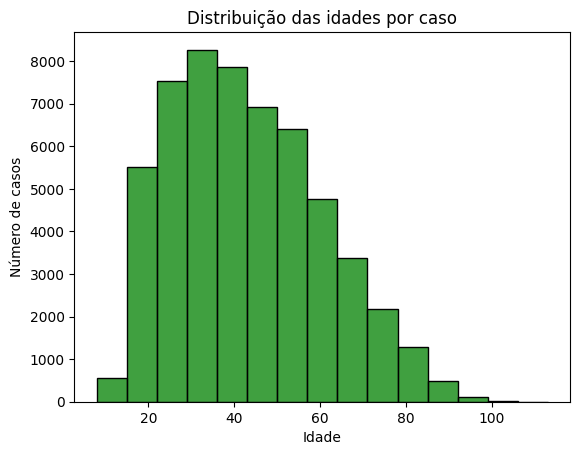

In [60]:
import matplotlib.pyplot as pltimport, seaborn as sns

sns.histplot(suicidio["IDADE"], bins=15, kde=False, color="green")
plt.title("Distribuição das idades por caso")
plt.xlabel("Idade")
plt.ylabel("Número de casos")
plt.show()


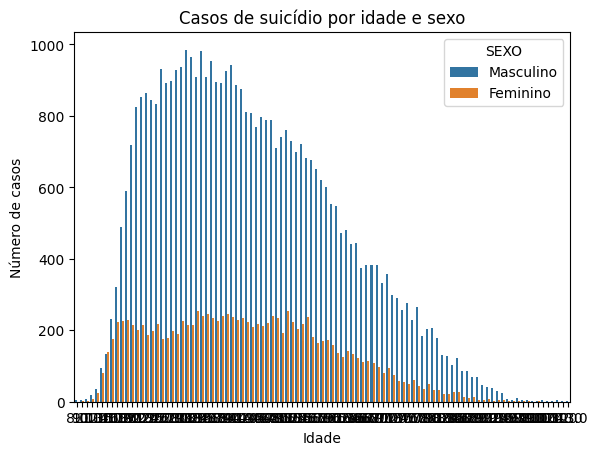

In [58]:
tabela = suicidio.groupby(["IDADE","SEXO"]).size().reset_index(name="CASOS")

sns.barplot(x="IDADE", y="CASOS", hue="SEXO", data=tabela)
plt.title("Casos de suicídio por idade e sexo")
plt.xlabel("Idade")
plt.ylabel("Número de casos")
plt.show()
